# Read radar data from NHABE radar



This notebook will take you through the following process:

1. GET DATA
2. ...

## 0. Import lib

Env: 
+ Conda: 23.7.4
+ Jupyter kernel: Python 3.11.4(miniconda)

Download pyart and install TINT env:
```
conda install -c conda-forge arm_pyart
```
then 
```
git clone https://github.com/openradar/TINT.git
```

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image, display
import tempfile
import os
import shutil

import sys
sys.path.append('../') # Path to TINT folder

import pyart
from tint.data_utils import get_nexrad_keys, read_nexrad_key
from tint import Cell_tracks, animate
from tint.visualization import embed_mp4_as_gif


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## 1. GET DATA


In [23]:
# Let's get some nexrad data from Amazon S3 to use for tracking
# I know of some storm cells that passed over Houston back in July of 2015
# keys = get_nexrad_keys('khgx', start='20150710_183000', end='20150710_193000')
keys = ["/Users/phucdang/Desktop/titan/2023/01/"+file_name for file_name in os.listdir("/Users/phucdang/Desktop/titan/2023/01/")]
keys.sort()
keys[:20]

['/Users/phucdang/Desktop/titan/2023/01/NHB230601000008.RAWLGZV',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601000304.RAWLGZZ',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601001008.RAWLH02',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601001302.RAWLH06',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601002007.RAWLH09',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601002304.RAWLH0D',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601003007.RAWLH0G',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601003302.RAWLH0L',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601004008.RAWLH0P',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601004303.RAWLH0U',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601005008.RAWLH0X',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601005302.RAWLH11',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601010007.RAWLH14',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601010303.RAWLH18',
 '/Users/phucdang/Desktop/titan/2023/01/NHB230601011008.RAWLH1B',
 '/Users/p

/Users/phucdang/Desktop/titan/2023/01/NHB230601000008.RAWLGZV
/Users/phucdang/Desktop/titan/2023/01/NHB230601000304.RAWLGZZ
/Users/phucdang/Desktop/titan/2023/01/NHB230601001008.RAWLH02
/Users/phucdang/Desktop/titan/2023/01/NHB230601001302.RAWLH06
/Users/phucdang/Desktop/titan/2023/01/NHB230601002007.RAWLH09
/Users/phucdang/Desktop/titan/2023/01/NHB230601002304.RAWLH0D
/Users/phucdang/Desktop/titan/2023/01/NHB230601003007.RAWLH0G
/Users/phucdang/Desktop/titan/2023/01/NHB230601003302.RAWLH0L
/Users/phucdang/Desktop/titan/2023/01/NHB230601004008.RAWLH0P
/Users/phucdang/Desktop/titan/2023/01/NHB230601004303.RAWLH0U
/Users/phucdang/Desktop/titan/2023/01/NHB230601005008.RAWLH0X
/Users/phucdang/Desktop/titan/2023/01/NHB230601005302.RAWLH11
/Users/phucdang/Desktop/titan/2023/01/NHB230601010007.RAWLH14


ffmpeg version 6.0 Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 14.0.3 (clang-1403.0.22.14.1)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/6.0 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disab

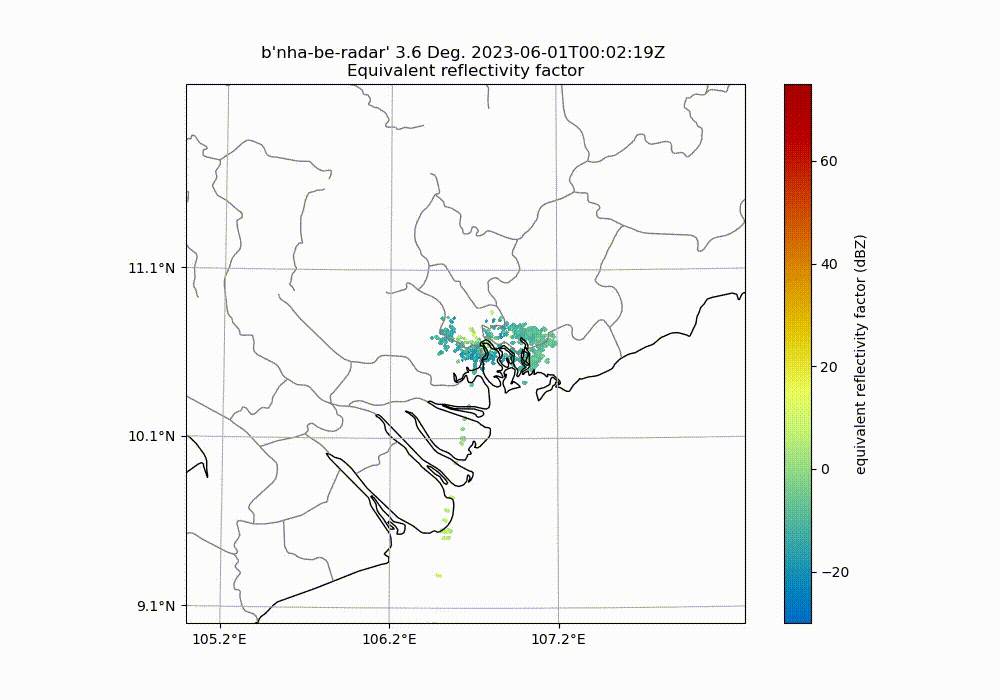

In [30]:
# We can visualize this data using pyart and matplotlib
fig = plt.figure(figsize=(10, 7))
for key in keys[:13]:
    print(key)

def plot_ppi(key):
    """ Plots ppi map of nexrad data given S3 key. """
    plt.clf()
    radar = pyart.io.read(key)
    display = pyart.graph.RadarMapDisplay(radar)
    display.plot_ppi_map('reflectivity', resolution='10m',
                         sweep=3, fig=fig,
                         lat_lines=np.arange(10.6 - 1.5, 10.6 + 1.5, 1),
                         lon_lines=np.arange(106.7 - 1.5, 106.7 + 1.5, 1),
                         min_lon=105, max_lon=108.3, min_lat=9,
                         max_lat=12.2,
                         lon_0=radar.longitude['data'][0],
                         lat_0=radar.latitude['data'][0])
    del display, radar


# First 13 raw data files in 01/06/23
ppi_anim = FuncAnimation(fig, plot_ppi, frames=keys[:13], interval=700)
tmp_anim = tempfile.NamedTemporaryFile()
ppi_anim.save(tmp_anim.name + '.mp4', writer='ffmpeg')
embed_mp4_as_gif(tmp_anim.name + '.mp4')
os.remove(tmp_anim.name + '.mp4')
plt.close()

### Check out

First Frame

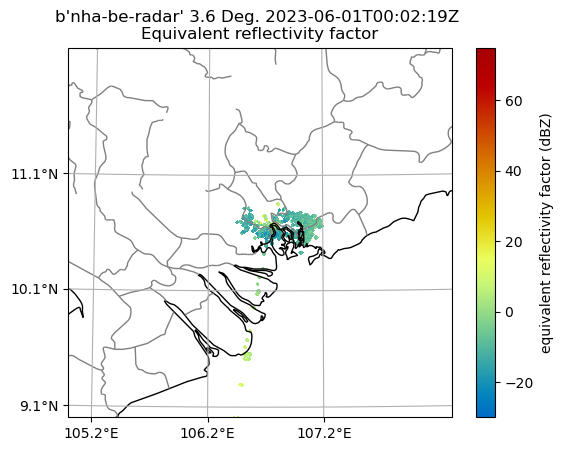

In [33]:
plot_ppi(keys[0])

Second Frame

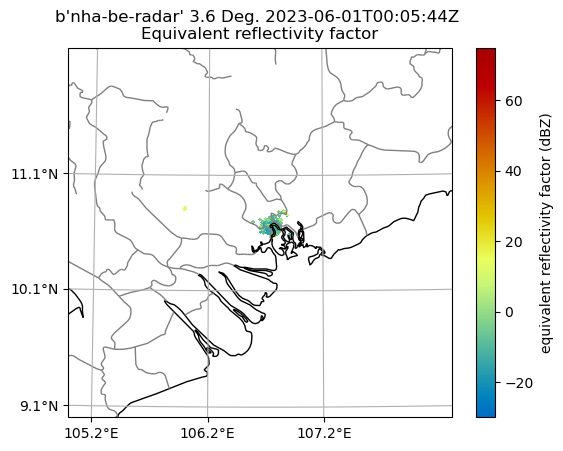

In [34]:
plot_ppi(keys[1])

Third Frame

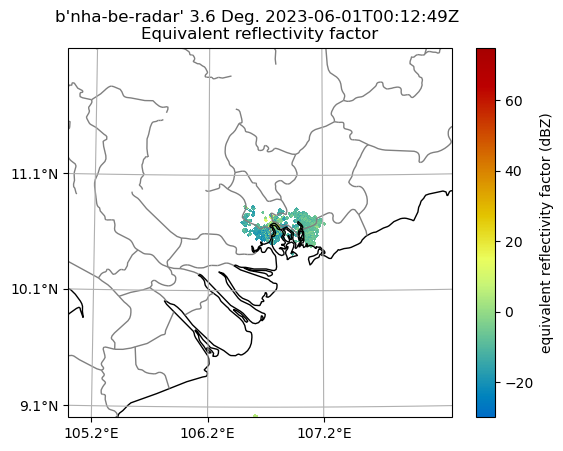

In [35]:
plot_ppi(keys[2])

## 2. GRID

* Radx2Grid

In [32]:
# Looks like there are some interesting cells coming off the gulf.
# Let's make a function that maps these volumes to cartesian grids using pyart.
# Most of the cells seem to be in the bottom right quadrant, so we'll only grid
# that part of the domain to save time.

def get_grid(radar):
    """ Returns grid object from radar object. """
    grid = pyart.map.grid_from_radars(
        radar, grid_shape=(31, 401, 401),
        grid_limits=((0, 15000), (-200000, 0), (0, 200000)),
        fields=['reflectivity'], gridding_algo='map_gates_to_grid',
        h_factor=0., nb=0.6, bsp=1., min_radius=200.)
    return grid


###################################
# Let's write these grids to a temporary location so that we can reuse them.
# This might take a few minutes
###################################
tmp_dir = tempfile.mkdtemp()
print('temporary directory:', tmp_dir)
filenames = []
for num, key in enumerate(keys[:13]):
    print('saving grid', num)
    radar = pyart.io.read(key)
    grid = get_grid(radar)
    name = os.path.join(tmp_dir, 'grid_' + str(num).zfill(3) + '.nc')
    filenames.append(name)
    pyart.io.write_grid(name, grid)
    del radar, grid

temporary directory: /var/folders/97/qq731g4565sbxx06ghqh1ryr0000gn/T/tmpes53v9iq
saving grid 0
saving grid 1
saving grid 2
saving grid 3
saving grid 4
saving grid 5
saving grid 6
saving grid 7
saving grid 8
saving grid 9
saving grid 10
saving grid 11
saving grid 12


In [36]:
# Now we can easily instantiate generators of these grids like so
grids = (pyart.io.read_grid(fn) for fn in filenames)

## 3. TRACK

In [37]:
# First, let's instantiate a tracks object and view the default parameters
tracks_obj = Cell_tracks()
tracks_obj.params

{'FIELD_THRESH': 32,
 'MIN_SIZE': 8,
 'SEARCH_MARGIN': 4000,
 'FLOW_MARGIN': 10000,
 'MAX_FLOW_MAG': 50,
 'MAX_DISPARITY': 999,
 'MAX_SHIFT_DISP': 15,
 'ISO_THRESH': 8,
 'ISO_SMOOTH': 3,
 'GS_ALT': 1500}

In [38]:
# The cells we're interested in look a bit small. Let's reduce the minimum size threshold.
tracks_obj.params['MIN_SIZE'] = 4
# We'll give the generator of grids we made earlier to the get_tracks method of our tracks object.
tracks_obj.get_tracks(grids)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [8]:
# Now we can view the 'tracks' attribute of our tracks object to see the results.
tracks_obj.tracks.head(20)

time   grid_x   grid_y      lon      lat   area  \
scan uid                                                                  
0    0   2015-07-10 18:34:06  243.176  160.294 -93.8368  28.3870   8.50   
     1   2015-07-10 18:34:06    9.353  186.588 -95.0327  28.5141  12.75   
     2   2015-07-10 18:34:06  132.832  191.434 -94.3981  28.5304  28.25   
     3   2015-07-10 18:34:06   75.346  189.423 -94.6949  28.5226   6.50   
     4   2015-07-10 18:34:06  333.875  235.005 -93.3662  28.7190  54.00   
     5   2015-07-10 18:34:06  388.000  232.674 -93.0895  28.7062  23.00   
     6   2015-07-10 18:34:06  310.732  233.744 -93.4842  28.7160  20.50   
     7   2015-07-10 18:34:06  223.622  233.541 -93.9302  28.7205   9.25   
     8   2015-07-10 18:34:06  265.609  240.848 -93.7145  28.7500  11.50   
     9   2015-07-10 18:34:06  198.780  244.732 -94.0579  28.7710  10.25   
     10  2015-07-10 18:34:06  263.294  251.529 -93.7292  28.7996   4.25   
     11  2015-07-10 18:34:06  346.455  253.364 -93.3033  28.7991   5.50   
     12  2015-07-10 18:34:06  348.067  275.233 -93.2913  28.8979  15.00   
     13  2015-07-10 18:34:06  122.400  278.046 -94.4520  28.9218  16.25   
     14  2015-07-10 18:34:06  289.824  339.000 -93.5850  29.1893   4.25   
1    15  2015-07-10 18:38:24  105.278  150.500 -94.5423  28.3467   4.50   
     16  2015-07-10 18:38:24  157.741  154.519 -94.2714  28.3678   6.75   
     0   2015-07-10 18:38:24  241.517  161.793 -93.8418  28.3960   7.25   
     1   2015-07-10 18:38:24    7.273  187.727 -95.0429  28.5186   8.25   
     2   2015-07-10 18:38:24  131.445  192.571 -94.4082  28.5394  29.75   

              vol        max  max_alt  isolated  
scan uid                                         
0    0     15.500  42.666897      4.5      True  
     1     33.500  41.691845      4.0     False  
     2     92.875  49.863453      5.5     False  
     3     11.000  41.088463      3.5      True  
     4    164.125  47.321510      7.0     False  
     5     34.500  42.496269      5.5      True  
     6     59.375  48.063271      6.0     False  
     7     30.500  45.998184      6.5     False  
     8     33.000  47.990311      6.0     False  
     9     23.875  47.172359      4.5      True  
     10     3.000  35.878979      2.5     False  
     11     3.500  37.381557      2.5     False  
     12    27.625  42.841183      4.5     False  
     13    49.625  49.762157      5.5      True  
     14     7.750  38.055103      3.5      True  
1    15     9.125  44.994991      4.0      True  
     16    11.500  39.081177      4.0      True  
     0     12.125  41.356445      4.5     False  
     1     17.125  39.393597      4.0     False  
     2     89.000  50.227497      5.0     False

## 4. VISUALIZE

In [9]:
# We can visualize these tracks to assess the performance of the algorithm.
# First we need to make another generator of the same grids for the animator
grids = (pyart.io.read_grid(fn) for fn in filenames)

In [10]:
# Let's save the animation in our temp directory so that it will be cleaned up later.
animate(tracks_obj, grids, os.path.join(tmp_dir, 'tint_demo_anim'),
        lat_lines=np.arange(27.9, 29.5, .5),
        lon_lines=np.arange(-95, -92.9, .5),
        tracers=True)

Animating 13 frames
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12


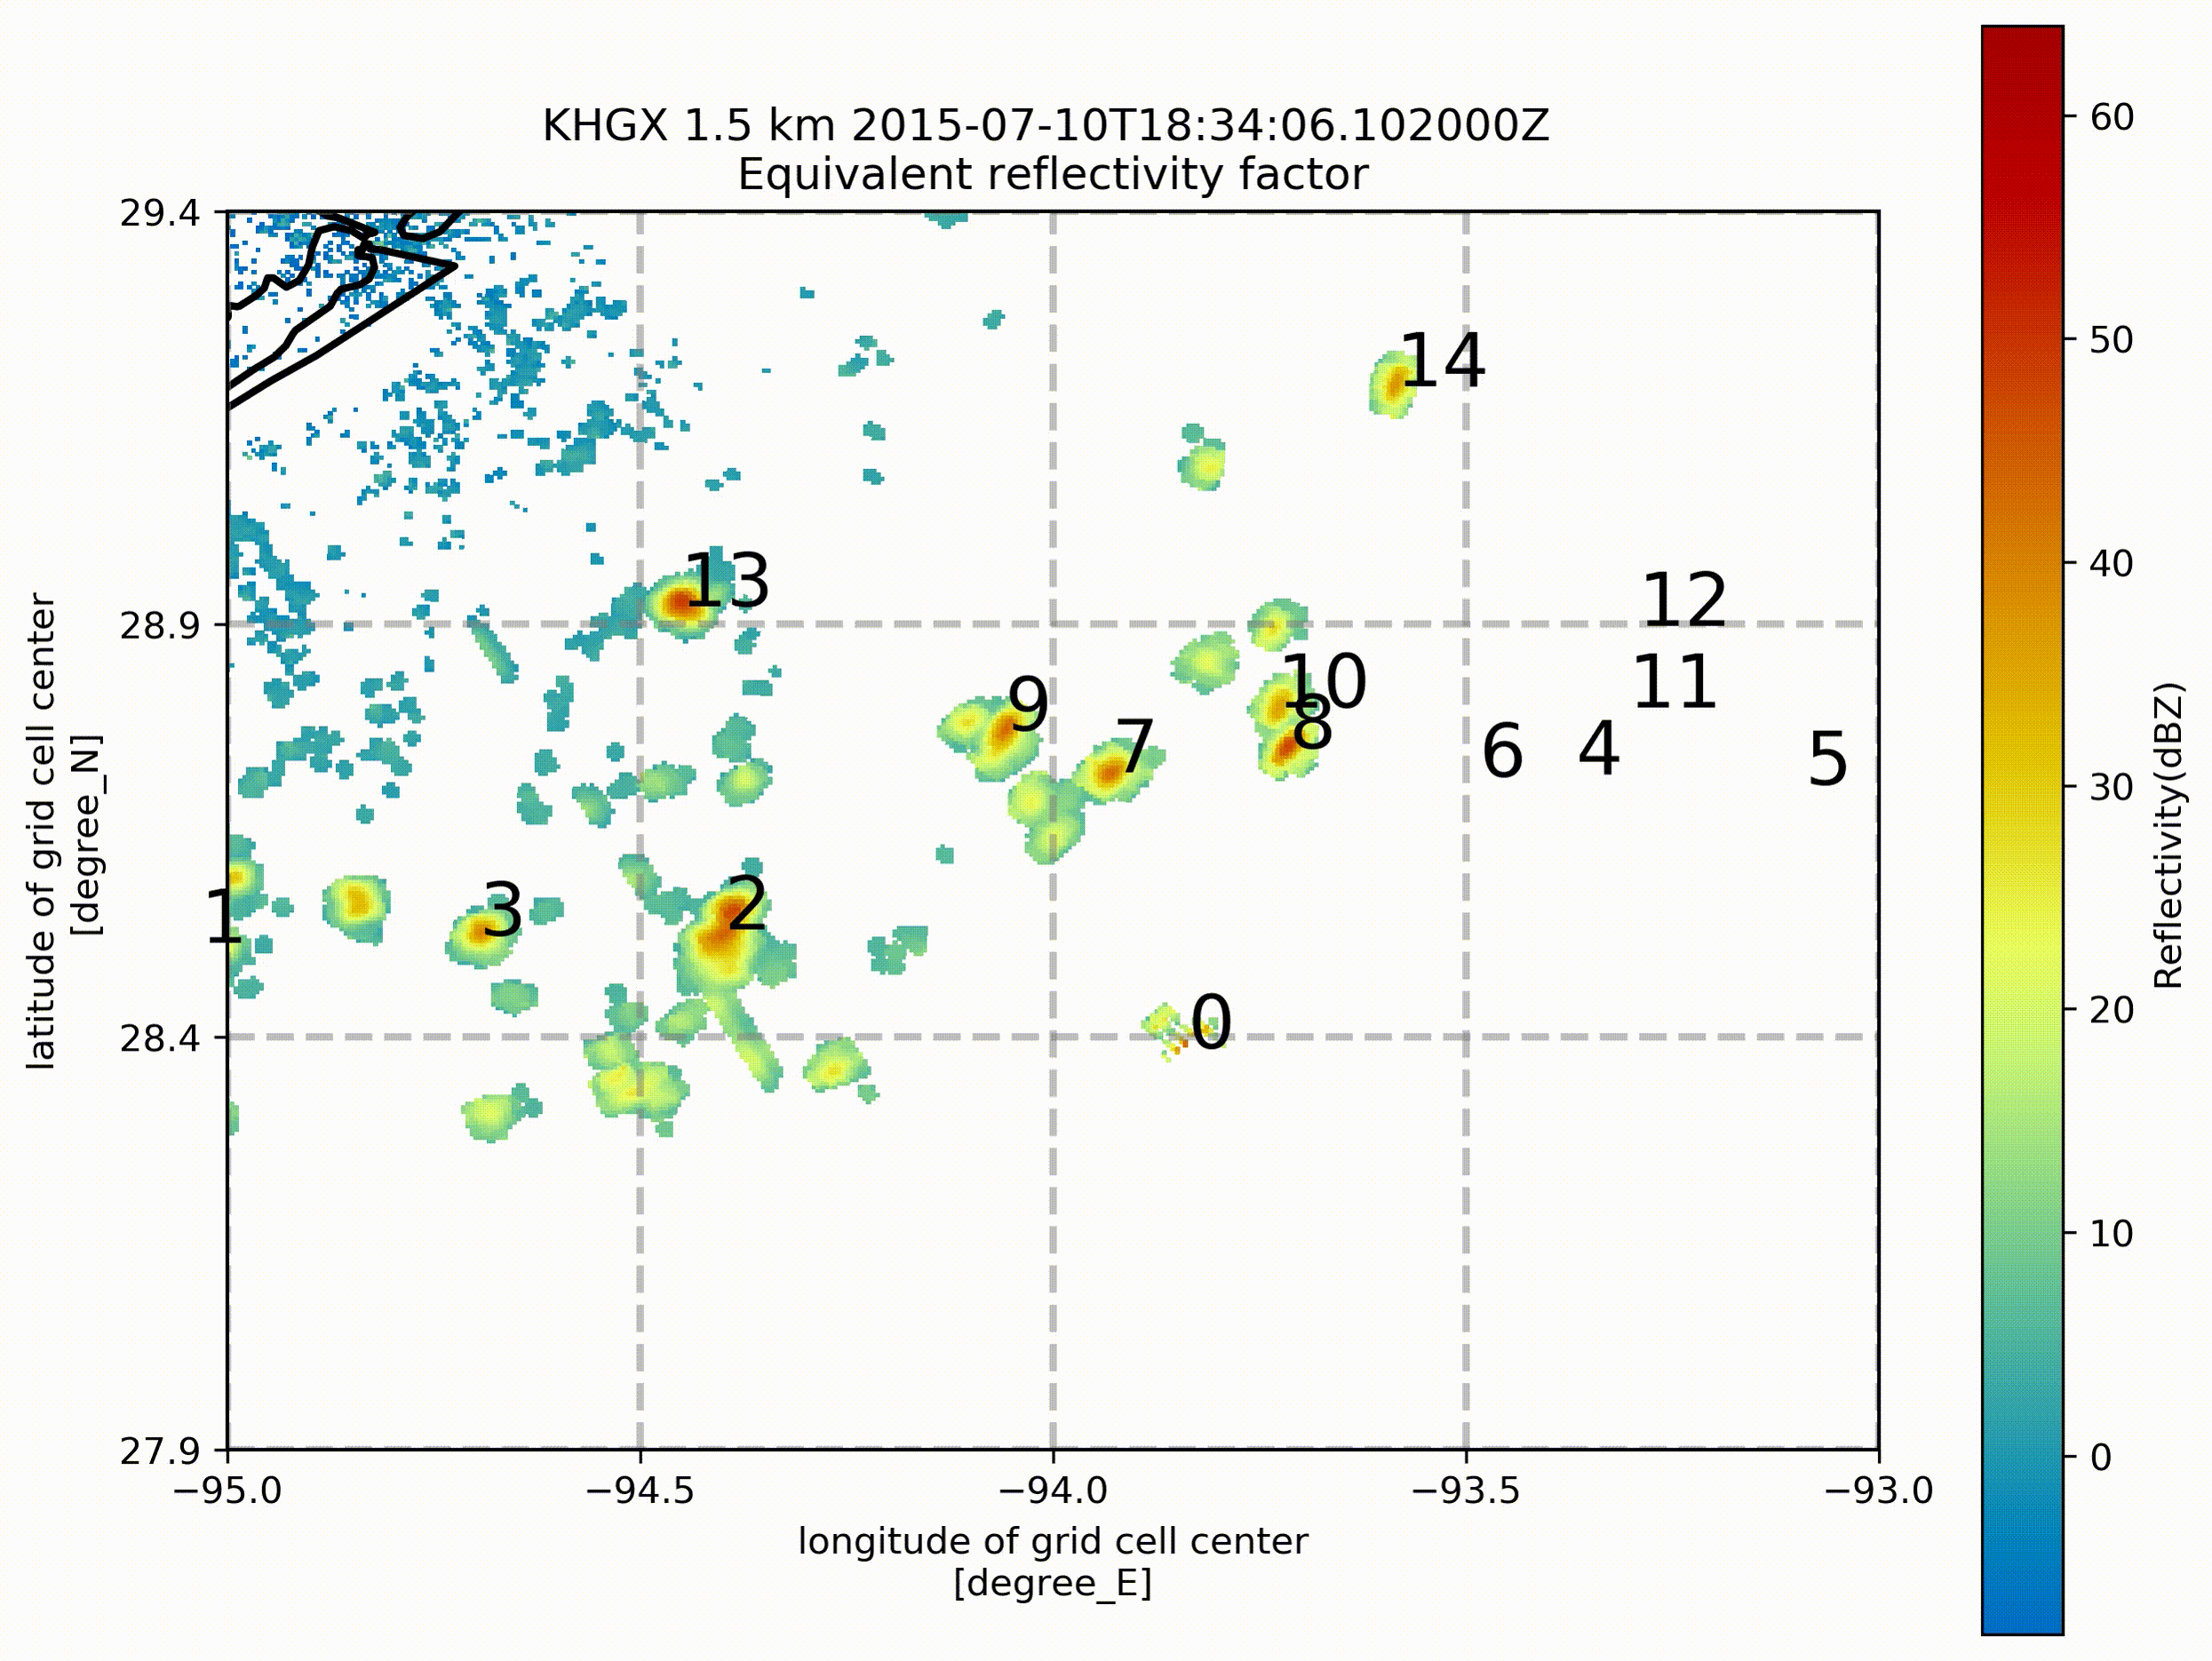

In [11]:
# The animator saved an mp4 to our local directory. Now we can embed it as a gif in this notebook.
embed_mp4_as_gif(os.path.join(tmp_dir, 'tint_demo_anim.mp4'))

In [12]:
# Let's find the cells that were tracked for the most frames
tracks_obj.tracks.groupby(level='uid').size().sort_values(ascending=False)[:5]

uid
0     13
3     13
4     13
16    12
19    10
dtype: int64

In [13]:
# Now we can view these cells from a lagrangian perspective
grids = (pyart.io.read_grid(fn) for fn in filenames)  # refresh grid generator
animate(tracks_obj, grids, os.path.join(tmp_dir, 'tint_demo_lagrangian'), style='lagrangian', uid='0', alt=2000)

Animating 13 frames
Frame: 0
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12


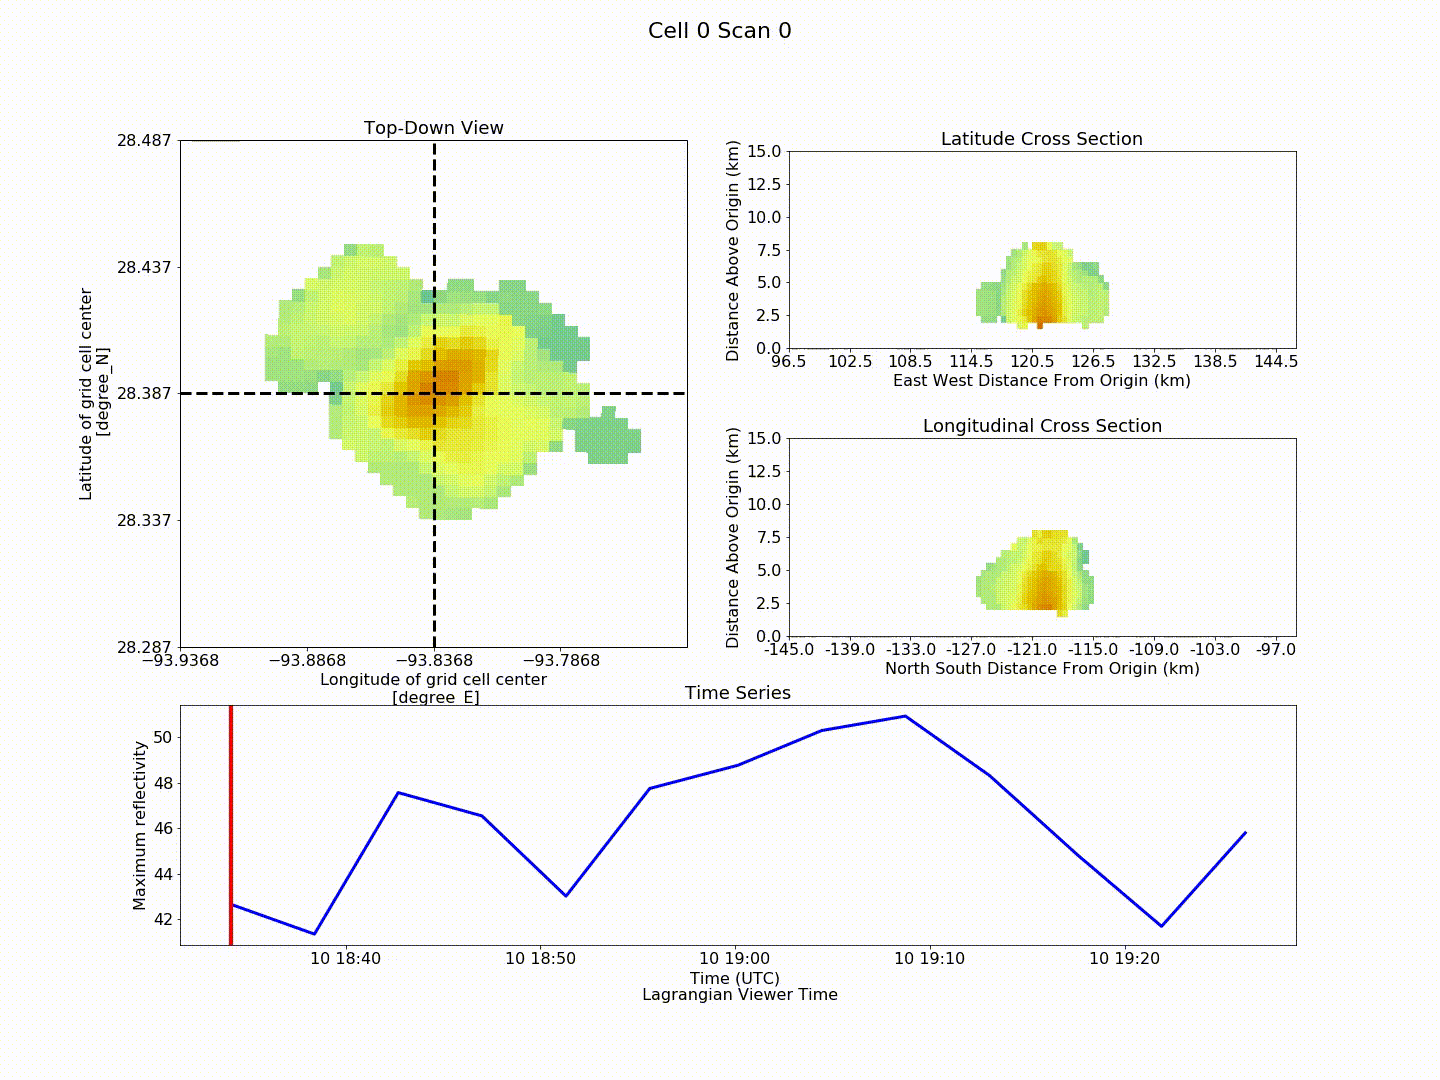

In [14]:
embed_mp4_as_gif(os.path.join(tmp_dir, 'tint_demo_lagrangian.mp4'))

In [15]:
# We can view the attributes of this cell throughout its lifetime
tracks_obj.tracks.xs('0', level='uid')

time   grid_x   grid_y      lon      lat   area     vol  \
scan                                                                          
0    2015-07-10 18:34:06  243.176  160.294 -93.8368  28.3870   8.50  15.500   
1    2015-07-10 18:38:24  241.517  161.793 -93.8418  28.3960   7.25  12.125   
2    2015-07-10 18:42:42  234.281  169.439 -93.8823  28.4278  14.25  34.250   
3    2015-07-10 18:47:00  232.862  169.379 -93.8874  28.4279  14.50  37.000   
4    2015-07-10 18:51:19  230.814  170.017 -93.8976  28.4325  14.75  30.125   
5    2015-07-10 18:55:37  228.106  172.176 -93.9128  28.4416  21.25  52.625   
6    2015-07-10 19:00:09  225.377  174.316 -93.9281  28.4507  28.50  79.750   
7    2015-07-10 19:04:27  222.928  176.775 -93.9381  28.4643  27.75  85.375   
8    2015-07-10 19:08:45  220.943  179.105 -93.9483  28.4734  26.25  92.000   
9    2015-07-10 19:13:04  218.181  181.143 -93.9635  28.4825  26.25  87.500   
10   2015-07-10 19:17:36  216.258  182.798 -93.9737  28.4916  22.25  67.000   
11   2015-07-10 19:21:54  214.494  185.145 -93.9838  28.5007  20.75  53.750   
12   2015-07-10 19:26:12  211.663  187.685 -93.9939  28.5142  23.00  54.875   

            max  max_alt  isolated  
scan                                
0     42.666897      4.5      True  
1     41.356445      4.5     False  
2     47.569725      4.5      True  
3     46.546478      4.5      True  
4     43.021236      4.5      True  
5     47.750183      5.0      True  
6     48.770615      5.5      True  
7     50.295033      6.5      True  
8     50.929760      7.0      True  
9     48.319210      7.0      True  
10    44.823208      6.5      True  
11    41.696564      5.0      True  
12    45.801319      5.0      True

## Clean Up

In [16]:
# Now we can delete the directory containing all the data and output from this demo.
shutil.rmtree(tmp_dir)
print('temporary directory removed')

temporary directory removed
